In [48]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("Import successful")

Import successful


In [49]:
#import data(csv format)
trainset = pd.read_csv("Housing_dataset_train.csv")
testset = pd.read_csv("Housing_dataset_test.csv")

In [50]:
trainset

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718


In [51]:
testset

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1
...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4,5,2
5996,2416,Adamawa,Terrace duplex,5,7,1
5997,10195,Oyo,Townhouse,4,1,4
5998,9455,Bauchi,Flat,3,7,5


In [52]:
trainset.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [82]:
trainset.corr()

C:\Users\Prof. Abada\AppData\Local\Temp\ipykernel_9340\308776907.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  trainset.corr()


,ID,bedroom,bathroom,parking_space,price,Encoding
ID,1.000000,0.230474,0.345121,0.165160,0.167093,NaN
bedroom,0.230474,1.000000,0.227417,0.111095,0.529145,NaN
bathroom,0.345121,0.227417,1.000000,0.178497,0.221544,NaN
parking_space,0.165160,0.111095,0.178497,1.000000,0.109211,NaN
price,0.167093,0.529145,0.221544,0.109211,1.000000,NaN
Encoding,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [54]:
# Add an 'Encoding' column to trainset with value 0
trainset['Encoding'] = 0

# Add an 'Encoding' column to testset with value 1
testset['Encoding'] = 1

# Concatenate trainset and testset together
combined_data = pd.concat([trainset, testset], ignore_index=True)

In [55]:
combined_data

,ID,loc,title,bedroom,bathroom,parking_space,price,Encoding
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,0
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689,0
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814,0
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,0
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898,0
...,...,...,...,...,...,...,...,...
19995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,1
19996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,1
19997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,1
19998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,1


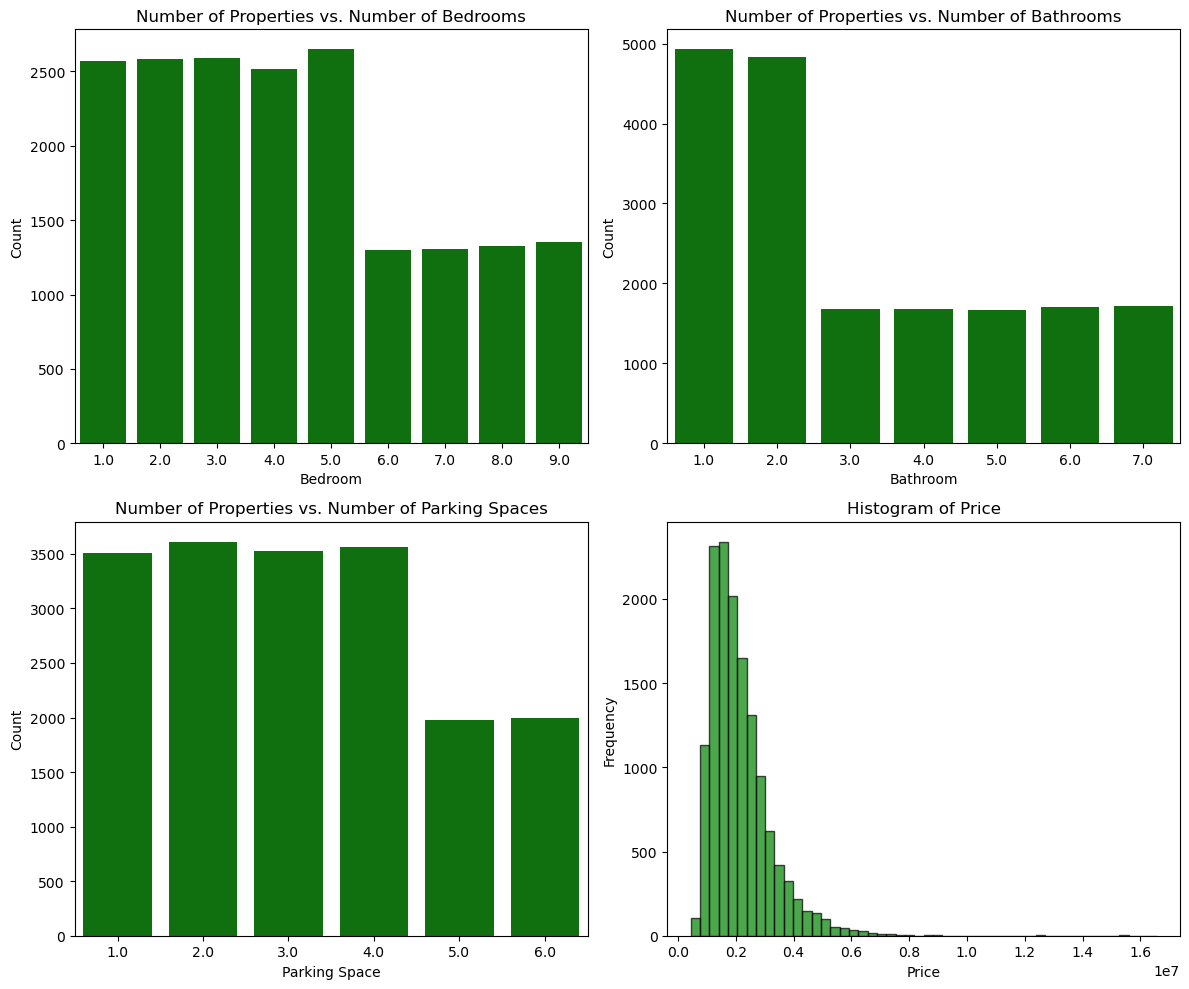

In [71]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot for Bedrooms
sns.countplot(x='bedroom', data=combined_data, ax=axes[0, 0],color = 'green')
axes[0, 0].set_xlabel('Bedroom')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Number of Properties vs. Number of Bedrooms')

# Plot for Bathrooms
sns.countplot(x='bathroom', data=combined_data, ax=axes[0, 1], color = 'green')
axes[0, 1].set_xlabel('Bathroom')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Number of Properties vs. Number of Bathrooms')

# Plot for Parking Spaces
sns.countplot(x='parking_space', data=combined_data, ax=axes[1, 0], color = 'green')
axes[1, 0].set_xlabel('Parking Space')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Number of Properties vs. Number of Parking Spaces')

# Plot for Price
axes[1, 1].hist(combined_data['price'], bins=50, edgecolor='black', alpha=0.7, color = 'green')
axes[1, 1].set_xlabel('Price')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Price')

# Adjust the layout to avoid overlapping titles
plt.tight_layout()

# Show the combined plot
plt.show()


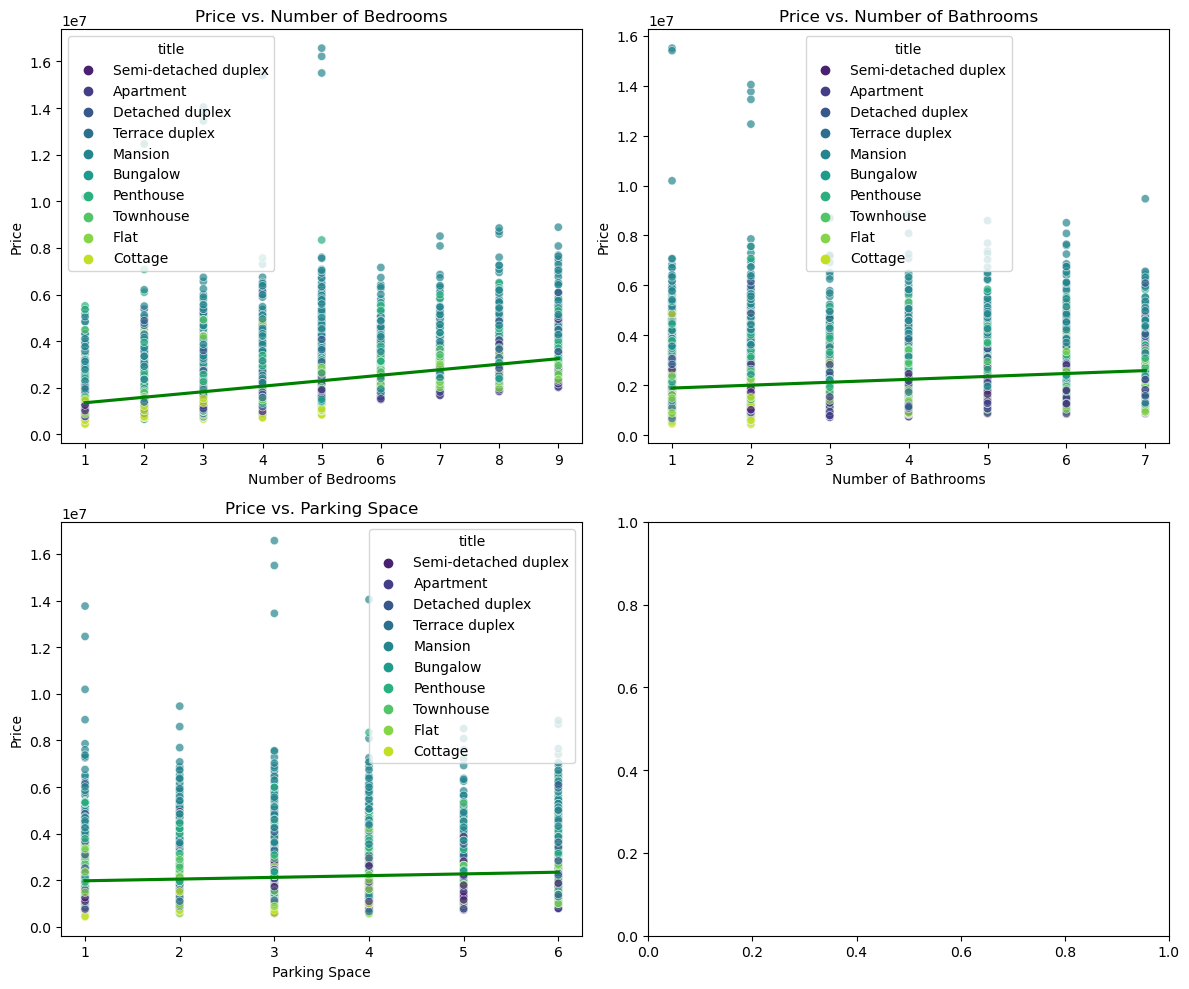

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the 'bedroom', 'bathroom', 'parking_space', and 'price' variables in your DataFrame (combined_data)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot for Bedroom vs. Price
sns.scatterplot(data=combined_data, x='bedroom', y='price', hue='title', palette='viridis', alpha=0.7, ax=axes[0, 0])
sns.regplot(data=combined_data, x='bedroom', y='price', scatter=False, ci=None, color='green', ax=axes[0, 0])  
axes[0, 0].set_xlabel('Number of Bedrooms')
axes[0, 0].set_ylabel('Price')
axes[0, 0].set_title('Price vs. Number of Bedrooms')

# Scatter plot for Bathroom vs. Price
sns.scatterplot(data=combined_data, x='bathroom', y='price', hue='title', palette='viridis', alpha=0.7, ax=axes[0, 1])
sns.regplot(data=combined_data, x='bathroom', y='price', scatter=False, ci=None, color='green', ax=axes[0, 1])  
axes[0, 1].set_xlabel('Number of Bathrooms')
axes[0, 1].set_ylabel('Price')
axes[0, 1].set_title('Price vs. Number of Bathrooms')

# Scatter plot for Parking Space vs. Price
sns.scatterplot(data=combined_data, x='parking_space', y='price', hue='title', palette='viridis', alpha=0.7, ax=axes[1, 0])
sns.regplot(data=combined_data, x='parking_space', y='price', scatter=False, ci=None, color='green', ax=axes[1, 0])  
axes[1, 0].set_xlabel('Parking Space')
axes[1, 0].set_ylabel('Price')
axes[1, 0].set_title('Price vs. Parking Space')

# Scatter plot for Price vs. Price (Histogram)
axes[1, 1].hist(combined_data['price'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Price')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Price')

# Adjust the layout to avoid overlapping titles
plt.tight_layout()

# Show the combined plot
plt.show()


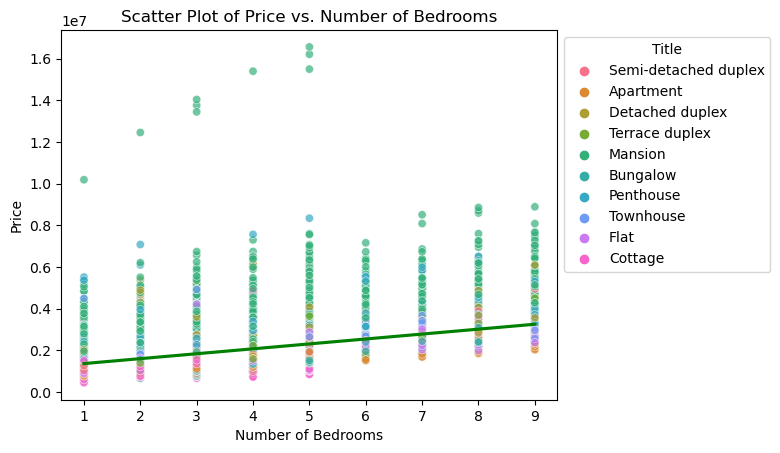

In [77]:
# Create a scatter plot with regression line and hue for number of bedrooms and price
sns.scatterplot(data=combined_data, x='bedroom', y='price', hue='title', alpha=0.7)
sns.regplot(data=combined_data, x='bedroom', y='price', scatter=False, ci=None, color='green')  # Add regression line
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Number of Bedrooms')
plt.legend(title='Title', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend location
plt.show()


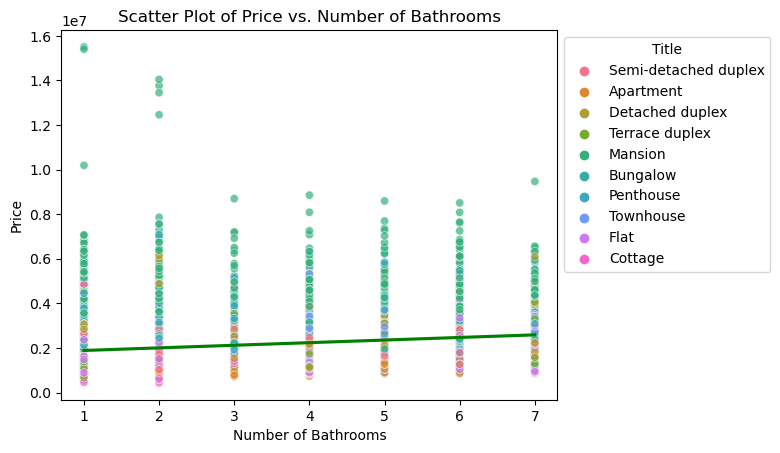

In [80]:
# Create a scatter plot with regression line and hue for number of bathrooms and price
sns.scatterplot(data=combined_data, x='bathroom', y='price', hue='title', alpha=0.7)
sns.regplot(data=combined_data, x='bathroom', y='price', scatter=False, ci=None, color='green')  # Add regression line
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Number of Bathrooms')
plt.legend(title='Title', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend location
plt.show()


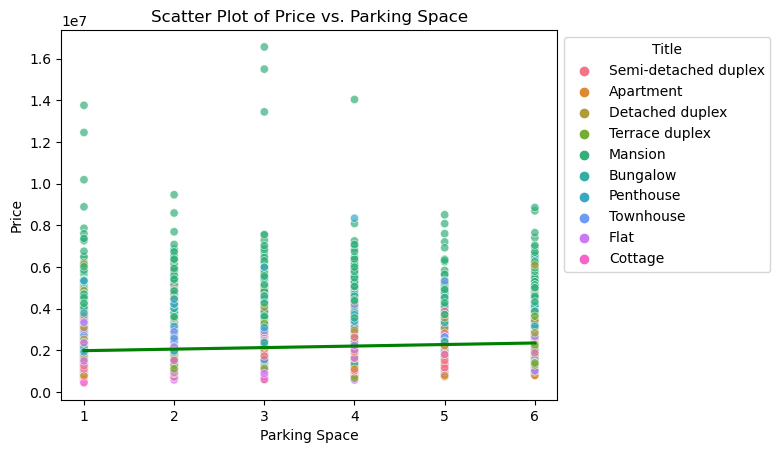

In [81]:
# Create a scatter plot with regression line and hue for parking space and price
sns.scatterplot(data=combined_data, x='parking_space', y='price', hue='title', alpha=0.7)
sns.regplot(data=combined_data, x='parking_space', y='price', scatter=False, ci=None, color='green')  # Add regression line
plt.xlabel('Parking Space')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Parking Space')
plt.legend(title='Title', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend location
plt.show()

In [9]:
# Count the number of missing values by column
missing_values = combined_data.isnull().sum()

# Print the number of missing values by column
print("Missing Values by Column:")
print(missing_values)

Missing Values by Column:
ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price            6000
Encoding            0
dtype: int64


In [10]:
#Drop missing categorical data values and fill numerical data values with the median
combined_data.dropna(subset=['loc', 'title'], inplace=True)
combined_data['bedroom'].fillna(combined_data['bedroom'].median(), inplace=True)
combined_data['bathroom'].fillna(combined_data['bathroom'].median(), inplace=True)
combined_data['parking_space'].fillna(combined_data['parking_space'].median(), inplace=True)
combined_data

,ID,loc,title,bedroom,bathroom,parking_space,price,Encoding
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,0
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689,0
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,0
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,0
5,1733,Borno,Mansion,4.0,1.0,3.0,1341750.867,0
...,...,...,...,...,...,...,...,...
19995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,1
19996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,1
19997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,1
19998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,1


In [11]:
# Add the new feature "house_size"
combined_data['house_size'] = combined_data['parking_space'] + combined_data['bedroom'] + combined_data['bathroom']

# Add the new feature "house_convenience"
combined_data['house_convenience'] = combined_data['bedroom'] / combined_data['bathroom']

#Add the new feature "total_convenience"
combined_data['total_convenience'] =combined_data['house_convenience']*combined_data['house_size']
combined_data

,ID,loc,title,bedroom,bathroom,parking_space,price,Encoding,house_size,house_convenience,total_convenience
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,0,5.0,1.000000,5.000000
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689,0,10.0,2.000000,20.000000
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,0,11.0,2.500000,27.500000
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,0,15.0,0.800000,12.000000
5,1733,Borno,Mansion,4.0,1.0,3.0,1341750.867,0,8.0,4.000000,32.000000
...,...,...,...,...,...,...,...,...,...,...,...
19995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,1,11.0,0.800000,8.800000
19996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,1,13.0,0.714286,9.285714
19997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,1,9.0,4.000000,36.000000
19998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,1,15.0,0.428571,6.428571


In [12]:
combined_data

,ID,loc,title,bedroom,bathroom,parking_space,price,Encoding,house_size,house_convenience,total_convenience
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,0,5.0,1.000000,5.000000
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689,0,10.0,2.000000,20.000000
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,0,11.0,2.500000,27.500000
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,0,15.0,0.800000,12.000000
5,1733,Borno,Mansion,4.0,1.0,3.0,1341750.867,0,8.0,4.000000,32.000000
...,...,...,...,...,...,...,...,...,...,...,...
19995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,1,11.0,0.800000,8.800000
19996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,1,13.0,0.714286,9.285714
19997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,1,9.0,4.000000,36.000000
19998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,1,15.0,0.428571,6.428571


In [13]:
#Target Encoding on title
property_type_encoding = {
    'Mansion': 10,
    'Penthouse': 9,
    'Detached duplex': 8,
    'Semi-detached duplex': 7,
    'Townhouse': 6,
    'Cottage': 5,
    'Terrace duplex': 4,
    'Bungalow': 3,
    'Flat': 2,
    'Apartment': 1
}

combined_data['title_encoded'] = combined_data['title'].map(property_type_encoding)
combined_data

,ID,loc,title,bedroom,bathroom,parking_space,price,Encoding,house_size,house_convenience,total_convenience,title_encoded
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,0,5.0,1.000000,5.000000,7
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689,0,10.0,2.000000,20.000000,1
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,0,11.0,2.500000,27.500000,8
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,0,15.0,0.800000,12.000000,4
5,1733,Borno,Mansion,4.0,1.0,3.0,1341750.867,0,8.0,4.000000,32.000000,10
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,1,11.0,0.800000,8.800000,2
19996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,1,13.0,0.714286,9.285714,4
19997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,1,9.0,4.000000,36.000000,6
19998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,1,15.0,0.428571,6.428571,2


In [14]:
import category_encoders as ce

# Initialize the target encoder
target_encoder = ce.TargetEncoder(cols=['loc'])

# Fit and transform the target encoder on the combined_data
combined_data['loc_encoded'] = target_encoder.fit_transform(combined_data['loc'], combined_data['price'])
combined_data_encoded = combined_data
combined_data_encoded

,ID,loc,title,bedroom,bathroom,parking_space,price,Encoding,house_size,house_convenience,total_convenience,title_encoded,loc_encoded
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,0,5.0,1.000000,5.000000,7,1.951331e+06
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689,0,10.0,2.000000,20.000000,1,2.252539e+06
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,0,11.0,2.500000,27.500000,8,2.364226e+06
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,0,15.0,0.800000,12.000000,4,1.761459e+06
5,1733,Borno,Mansion,4.0,1.0,3.0,1341750.867,0,8.0,4.000000,32.000000,10,1.713052e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,1,11.0,0.800000,8.800000,2,2.107909e+06
19996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,1,13.0,0.714286,9.285714,4,1.881336e+06
19997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,1,9.0,4.000000,36.000000,6,2.287374e+06
19998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,1,15.0,0.428571,6.428571,2,1.748597e+06


In [15]:
# Divide 'loc_encoded' by 10,000,000 and round up to two significant digits to reduce overfitting
combined_data['loc_encoded'] = np.round(combined_data['loc_encoded'] / 10000000, 2)

# Print the encoded values
print(combined_data[['loc', 'loc_encoded']])

           loc  loc_encoded
0      Katsina         0.20
1         Ondo         0.23
3      Anambra         0.24
4         Kogi         0.18
5        Borno         0.17
...        ...          ...
19995    Ekiti         0.21
19996  Adamawa         0.19
19997      Oyo         0.23
19998   Bauchi         0.17
19999   Sokoto         0.17

[16531 rows x 2 columns]


In [16]:
#Drop the location and title columns of Combined_data_encoded
combined_data_encoded.drop(['loc', 'title'], axis=1, inplace=True)

In [17]:
# Split combined_data_encoded into trainset_encoded and testset_encoded
trainset_encoded = combined_data_encoded[combined_data_encoded['Encoding'] == 0].drop(columns='Encoding')
testset_encoded = combined_data_encoded[combined_data_encoded['Encoding'] == 1].drop(columns='Encoding')
trainset_encoded

,ID,bedroom,bathroom,parking_space,price,house_size,house_convenience,total_convenience,title_encoded,loc_encoded
0,3583,2.0,2.0,1.0,1149999.565,5.0,1.000000,5.000000,7,0.20
1,2748,4.0,2.0,4.0,1672416.689,10.0,2.000000,20.000000,1,0.23
3,2224,5.0,2.0,4.0,2410306.756,11.0,2.500000,27.500000,8,0.24
4,10300,4.0,5.0,6.0,2600700.898,15.0,0.800000,12.000000,4,0.18
5,1733,4.0,1.0,3.0,1341750.867,8.0,4.000000,32.000000,10,0.17
...,...,...,...,...,...,...,...,...,...,...
13994,10477,8.0,1.0,6.0,2837199.086,15.0,8.000000,120.000000,8,0.19
13995,6175,4.0,7.0,3.0,2367927.861,14.0,0.571429,8.000000,3,0.23
13996,9704,4.0,7.0,5.0,2228516.471,16.0,0.571429,9.142857,1,0.19
13997,11190,8.0,6.0,5.0,2406812.693,19.0,1.333333,25.333333,3,0.19


In [18]:
from sklearn.model_selection import train_test_split
X = trainset_encoded.drop(['ID','price'], axis = 1)
Y = trainset_encoded['price']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Printing the shape of the resulting datasets
print("Training set - X shape:", X_train.shape)
print("Training set - Y shape:", Y_train.shape)
print("Testing set - X shape:", X_test.shape)
print("Testing set - Y shape:", Y_test.shape)

Training set - X shape: (8424, 8)
Training set - Y shape: (8424,)
Testing set - X shape: (2107, 8)
Testing set - Y shape: (2107,)


In [19]:
X_train

,bedroom,bathroom,parking_space,house_size,house_convenience,total_convenience,title_encoded,loc_encoded
1664,7.0,5.0,6.0,18.0,1.400000,25.200000,2,0.17
2141,2.0,1.0,3.0,6.0,2.000000,12.000000,7,0.19
11403,1.0,3.0,3.0,7.0,0.333333,2.333333,3,0.17
7144,4.0,2.0,2.0,8.0,2.000000,16.000000,10,0.31
13452,2.0,5.0,1.0,8.0,0.400000,3.200000,8,0.19
...,...,...,...,...,...,...,...,...
7592,9.0,7.0,6.0,22.0,1.285714,28.285714,7,0.17
6860,1.0,7.0,3.0,11.0,0.142857,1.571429,4,0.24
7124,4.0,1.0,4.0,9.0,4.000000,36.000000,7,0.19
1139,5.0,2.0,3.0,10.0,2.500000,25.000000,5,0.17


In [20]:
import catboost as cb

# Assuming you have your independent variables stored in X_train and dependent variable stored in Y_train

# Create an instance of the CatBoostRegressor
model = cb.CatBoostRegressor(silent = True)

# Train the CatBoost model on the training set
model.fit(X_train, Y_train)

In [21]:
X_test

,bedroom,bathroom,parking_space,house_size,house_convenience,total_convenience,title_encoded,loc_encoded
5616,4.0,1.0,4.0,9.0,4.000000,36.0,10,0.23
2816,3.0,2.0,1.0,6.0,1.500000,9.0,2,0.21
1862,3.0,2.0,1.0,6.0,1.500000,9.0,4,0.31
7135,5.0,2.0,2.0,9.0,2.500000,22.5,2,0.27
3815,7.0,3.0,2.0,12.0,2.333333,28.0,9,0.21
...,...,...,...,...,...,...,...,...
2850,6.0,3.0,3.0,12.0,2.000000,24.0,4,0.17
10791,2.0,2.0,1.0,5.0,1.000000,5.0,4,0.26
12704,1.0,1.0,2.0,4.0,1.000000,4.0,6,0.18
5246,4.0,2.0,3.0,9.0,2.000000,18.0,9,0.23


In [22]:
#Y_valid

In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming you have trained the model and obtained the predictions in 'predictions'

# Separate the target variable (price) from the trainset and drop NaN values
#Y_train = trainset_encoded['price'].dropna()
#X_train = trainset_encoded.drop(['price'], axis=1).dropna()

# Split the trainset into training and validation sets

y_pred = model.predict(X_test)
# Ensure that 'predictions' only contains values corresponding to the validation set
#predictions = predictions[:len(Y_valid)]

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_pred, Y_test))

# Print the RMSE
print("RMSE:", rmse)


RMSE: 418160.65273191803


In [24]:
testset_encoded

,ID,bedroom,bathroom,parking_space,price,house_size,house_convenience,total_convenience,title_encoded,loc_encoded
14000,845,4.0,1.0,2.0,NaN,7.0,4.000000,28.000000,9,0.21
14001,1924,2.0,2.0,4.0,NaN,8.0,1.000000,8.000000,1,0.19
14002,10718,2.0,7.0,2.0,NaN,11.0,0.285714,3.142857,3,0.19
14003,12076,9.0,5.0,2.0,NaN,16.0,1.800000,28.800000,10,0.42
14004,12254,5.0,6.0,1.0,NaN,12.0,0.833333,10.000000,7,0.18
...,...,...,...,...,...,...,...,...,...,...
19995,1594,4.0,5.0,2.0,NaN,11.0,0.800000,8.800000,2,0.21
19996,2416,5.0,7.0,1.0,NaN,13.0,0.714286,9.285714,4,0.19
19997,10195,4.0,1.0,4.0,NaN,9.0,4.000000,36.000000,6,0.23
19998,9455,3.0,7.0,5.0,NaN,15.0,0.428571,6.428571,2,0.17


In [25]:
testset_encoded = testset_encoded.drop(['ID'], axis = 1)
testset_encoded

,bedroom,bathroom,parking_space,price,house_size,house_convenience,total_convenience,title_encoded,loc_encoded
14000,4.0,1.0,2.0,NaN,7.0,4.000000,28.000000,9,0.21
14001,2.0,2.0,4.0,NaN,8.0,1.000000,8.000000,1,0.19
14002,2.0,7.0,2.0,NaN,11.0,0.285714,3.142857,3,0.19
14003,9.0,5.0,2.0,NaN,16.0,1.800000,28.800000,10,0.42
14004,5.0,6.0,1.0,NaN,12.0,0.833333,10.000000,7,0.18
...,...,...,...,...,...,...,...,...,...
19995,4.0,5.0,2.0,NaN,11.0,0.800000,8.800000,2,0.21
19996,5.0,7.0,1.0,NaN,13.0,0.714286,9.285714,4,0.19
19997,4.0,1.0,4.0,NaN,9.0,4.000000,36.000000,6,0.23
19998,3.0,7.0,5.0,NaN,15.0,0.428571,6.428571,2,0.17


In [26]:
testset_encoded.drop(['price'], axis=1, inplace=True)

In [27]:
testset_encoded

,bedroom,bathroom,parking_space,house_size,house_convenience,total_convenience,title_encoded,loc_encoded
14000,4.0,1.0,2.0,7.0,4.000000,28.000000,9,0.21
14001,2.0,2.0,4.0,8.0,1.000000,8.000000,1,0.19
14002,2.0,7.0,2.0,11.0,0.285714,3.142857,3,0.19
14003,9.0,5.0,2.0,16.0,1.800000,28.800000,10,0.42
14004,5.0,6.0,1.0,12.0,0.833333,10.000000,7,0.18
...,...,...,...,...,...,...,...,...
19995,4.0,5.0,2.0,11.0,0.800000,8.800000,2,0.21
19996,5.0,7.0,1.0,13.0,0.714286,9.285714,4,0.19
19997,4.0,1.0,4.0,9.0,4.000000,36.000000,6,0.23
19998,3.0,7.0,5.0,15.0,0.428571,6.428571,2,0.17


In [28]:
model.fit(X, Y)
test_predictions = model.predict(testset_encoded)
submission = pd.DataFrame({'ID': testset.ID, 'Predicted Price': test_predictions})
submission.to_csv('cb_comdata_con_tedivten.csv', index=False)